In [2]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer


In [3]:
#読み込み
import_data_pd = pickle.load(open("import_data_pd_max.sav","rb"))

In [4]:
import_data_list = import_data_pd["text"].values.tolist()

In [5]:
#読み込み
sentence_list = pickle.load(open("sentence_list_proper_noun_ippan.sav","rb"))

In [6]:
docs = np.array(sentence_list)
docs.shape

(9692,)

In [7]:
X = pd.DataFrame(docs)
Y = import_data_pd["category_od"]

In [8]:
N_train = int(len(X.index) * 0.8)
N_test = len(X.index) - N_train

In [13]:
import_data_pd['text'][0]

'一軍は大阪府をプロ野球地域保護権保護地域とし、大阪市西区大阪市西区にある大阪ドーム現：京セラドーム大阪を、大阪近鉄バファローズファーム二軍ウエスタン・リーグ所属はかつて一軍の本拠地だった藤井寺球場を本拠地にしていた。球団愛称の正式表記は「バファローズ」であり、「バッファローズ」ではない経緯に関しては#球団愛称後述。1999年3月末までの球団名は近鉄バファローズで、地域密着を謳うために1999年4月1日付で上記球団名に改称された後も通称として使われていた。なお、運営法人の商号は株式会社大阪バファローズ、近畿日本鉄道株式会社の100%の連結対象子会社額面500円だった。2004年、球団と近鉄グループの経営難からオリックス・ブルーウェーブの運営会社「オリックス野球クラブ」に営業譲渡し、大阪バファローズは2005年3月末をもって解散。職員の大半はオリックス野球クラブに、一部は楽天野球団に移り、選手は分配ドラフトによりオリックス・バファローズブルーウェーブから改称と同時に新規参入した東北楽天ゴールデンイーグルスに配分された。オリックスの球団史において大阪近鉄バファローズは傍系扱いとなるため、チームタイトルや個人賞などの各種記録については一切含まれない。このような、球団史が引き継がれずに終焉する形でのチーム消滅は1958年の大映ユニオンズ以来の出来事となる。合併までの経緯・詳細についてはプロ野球再編問題2004年を参照。1944年6月から1947年5月まで南海電気鉄道南海鉄道と大阪電気軌道関西急行鉄道の戦時統合によって設立された近畿日本鉄道が運営していた福岡ソフトバンクホークス近畿日本軍→近畿グレートリングとの球団の系譜としてのつながりはなく、これは現在の福岡ソフトバンクホークスの系譜である。球団が消滅した2004年時点で現存していた12球団の中では、4回出場した日本選手権シリーズ日本シリーズで優勝していない唯一の球団であった。'

In [110]:
expected_value = 0
expected_value_new = 0

vectorizer = TfidfVectorizer(use_idf=True, token_pattern=u'(?u)\\b\\w+\\b')

drop_columns_list = []

In [ ]:
#前処理
#tfidf

In [20]:
expected_value = 0
expected_value_new = 0

vectorizer = TfidfVectorizer(use_idf=True, token_pattern=u'(?u)\\b\\w+\\b')

drop_columns_list = []


while expected_value <= expected_value_new:
    expected_value = expected_value_new
    
    print(1)
    
    #シャッフルして分割
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=N_test,shuffle = True)
    
    #学習データをベクトル化
    docs_train = np.reshape(X_train.values,(len(X_train.index)))
    docs_train_vec = vectorizer.fit_transform(docs_train)
    
    X_train_vec = pd.DataFrame(docs_train_vec.toarray())
    X_train_vec.columns = vectorizer.get_feature_names()
    
    #不要なカラムを削除
    contain_list = list(set(drop_columns_list) & set(X_train_vec.columns))
    X_train_vec = X_train_vec.drop(contain_list,axis=1)
    
    #モデル作成
    clf = RandomForestClassifier(n_estimators=100)
    
    clf.fit(X_train_vec, Y_train)
    
    #特徴量
    features = X_train_vec.columns
    importances = clf.feature_importances_
    indices = np.argsort(importances)
    
    #テストデータをベクトル化
    docs_test = np.reshape(X_test.values,(len(X_test.index)))
    docs_test_vec = vectorizer.transform(docs_test)
    
    X_test_vec = pd.DataFrame(docs_test_vec.toarray())
    X_test_vec.columns = vectorizer.get_feature_names()
    
    #不要なカラムを削除
    X_test_vec = X_test_vec.drop(contain_list,axis=1)
    
    #精度
    accuracy = clf.score(X_test_vec, Y_test)
    
    #確率
    probability =  clf.predict_proba(X_test_vec)
    
    #スコア
    score = 0
    failed_list = []
    Y_test_list = list(Y_test)
    for i in range(len(probability)):
        rabel = Y_test_list[i]
        if np.where(probability[i]==np.sort(probability[i])[-1])[0][0] == rabel:
            score += 1
        elif np.where(probability[i]==np.sort(probability[i])[-2])[0][0] == rabel:
            score += 0.5
        elif np.where(probability[i]==np.sort(probability[i])[-3])[0][0] == rabel:
            score += 0.25
        else:
            failed_list.append(X_test.index[i])
    
    #期待値
    expected_value_new = score/len(probability)
    
    print("accuracy:" + str(accuracy) + " score:" + str(score) + " expected_value:" + str(expected_value_new))
    
    drop_columns_list.extend(features[importances[indices] == 0].values)
    drop_columns_list = list(set(drop_columns_list))
print('end')

1
accuracy:0.6240330067044868 score:1366.5 expected_value:0.7047447137699845
1
accuracy:0.5807117070654977 score:1295.5 expected_value:0.6681279009798865
end


In [30]:
failed_list

[5645,
 9247,
 5203,
 4097,
 6252,
 5277,
 6827,
 3897,
 5267,
 70,
 4080,
 3902,
 2881,
 238,
 9471,
 6187,
 4588,
 6557,
 7489,
 5428,
 8731,
 1818,
 6616,
 5111,
 4781,
 8019,
 8211,
 8896,
 9598,
 7933,
 2393,
 7556,
 2268,
 6074,
 989,
 8130,
 8443,
 7352,
 3189,
 1789,
 5856,
 9383,
 8518,
 4873,
 3290,
 3216,
 7485,
 2219,
 3286,
 1177,
 3385,
 6006,
 7176,
 4808,
 5708,
 6082,
 7571,
 9651,
 3790,
 9423,
 4997,
 4516,
 7479,
 4099,
 3994,
 9459,
 6348,
 8632,
 7858,
 8461,
 7585,
 3320,
 7910,
 4069,
 646,
 3217,
 5131,
 2314,
 1289,
 6671,
 7810,
 9530,
 3067,
 2055,
 3978,
 1679,
 8069,
 915,
 4101,
 8819,
 3196,
 6544,
 4006,
 1932,
 2018,
 6091,
 637,
 3369,
 9688,
 8229,
 8873,
 86,
 3447,
 4962,
 1926,
 7974,
 6758,
 1662,
 7257,
 770,
 3862,
 3293,
 4017,
 5384,
 4970,
 351,
 5118,
 4766,
 8168,
 1163,
 2556,
 2632,
 4399,
 5245,
 9488,
 2305,
 6676,
 3582,
 9346,
 7370,
 1984,
 77,
 3198,
 8603,
 166,
 9068,
 4971,
 7021,
 5053,
 1294,
 8970,
 9552,
 7500,
 9338,
 2597,

In [48]:
import_data_pd.iloc[[failed_list[0]]]

,category,text,company,category_od
5645,6050,大阪市中央区大阪市中央区の卸売卸売業が集まる船場大阪市船場地域に本社を置いている。大阪市中央...,萬栄,25


In [53]:
X.iloc[[5645]].values[0]

array(['大阪 中央 大阪 中央 船場 大阪 船場 地域 本社 大阪 中央 大阪 中央 南久宝寺 衣料 用品 家庭 用品 大阪 基盤 企業 メイン バンク メイン バンク 第一勧業銀行 みずほ 銀行 船場 本社 箕面 支社 みずほ 銀行 店舗 現金 自動 預け 払い atm'],
      dtype=object)

In [ ]:
#各カテゴリの文章中にある出現頻度の高い単語(卸、倉庫etc)を洗い出す
#辞書に登録する


#グループ企業も説明変数に追加できるのであればする

In [108]:
tuned_parameters = {'n_estimators':[300],'max_features':[1]}
clf = GridSearchCV(
    RandomForestClassifier(), # 識別器
    tuned_parameters, # 最適化したいパラメータセット 
    cv=1, # 交差検定の回数
    scoring='accuracy', 
    n_jobs=-1) 

In [42]:
#clf = RandomForestClassifier(n_estimators=300, max_features=3)
clf = RandomForestClassifier(n_estimators=300)

In [57]:
clf_trained = clf.fit(X_train, Y_train)

In [58]:
#特徴量確認
import matplotlib.pyplot as plt
%matplotlib inline

features = X_train.columns
importances = clf.feature_importances_
indices = np.argsort(importances)

In [59]:
from matplotlib.font_manager import FontProperties
fp = FontProperties(fname=r'c:\Windows\Fonts\meiryo.ttc')

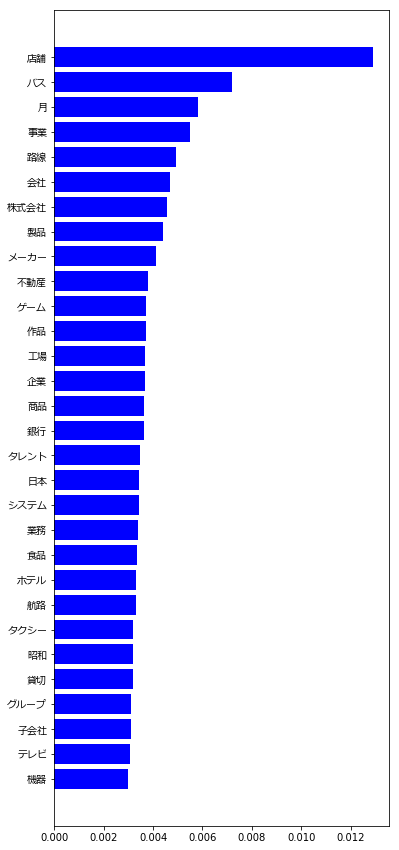

In [60]:
indices_slice = indices[-30::]

plt.figure(figsize=(6,15))
plt.barh(range(len(indices_slice)),importances[indices_slice],color="b",align="center")
plt.yticks(range(len(indices_slice)),features[indices_slice],fontproperties=fp)
plt.show()

In [61]:
docs_test = X_test.as_matrix()
docs_test = np.reshape(docs_test,(len(docs_test)))
vecs_test = vectorizer.transform(docs_test)

C:\Users\tamura\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [62]:
X_test_df = pd.DataFrame(vecs_test.toarray())
X_test_df.columns = vectorizer.get_feature_names()
X_test_df

,a,aa,aaa,aac,aacsb,aajr,aaku,aap,aard,ab,...,龍野,龍門,﨑三永,﨑喜三,﨑恒宏,﨑敏,﨑篤史,﨑謙治,﨑賢人,﨑酒造
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:

X_test_df = X_test_df.drop(drop_columns_list,axis=1)

In [64]:
score = clf.score(X_test_df, Y_test)
score

ValueError: Number of features of the model must match the input. Model n_features is 37182 and input n_features is 39490 

In [52]:
probability =  clf.predict_proba(X_test_df)

In [53]:
score = 0
Y_test_list = list(Y_test)
for i in range(len(probability)):
    rabel = Y_test_list[i]
    if np.where(probability[i]==np.sort(probability[i])[-1])[0][0] == rabel:
        score += 1
    elif np.where(probability[i]==np.sort(probability[i])[-2])[0][0] == rabel:
        score += 0.5
    elif np.where(probability[i]==np.sort(probability[i])[-3])[0][0] == rabel:
        score += 0.25
score/len(probability)

1354.75

0.6986848891181021

In [55]:
features[importances[indices] == 0]

Index(['jocx', 'jodf', 'joei', 'joey', 'jogh', 'jogi', 'jogr', 'johnny',
       'johnson', 'johntu',
       ...
       'soba', 'soc', 'sociétéd', 'sod', 'sodstar', 'sofina', 'soft',
       'softbank', 'softether', 'softic'],
      dtype='object', length=1938)

In [56]:
drop_columns_list = features[importances[indices] == 0]
X_train = X_train.drop(drop_columns_list,axis=1)

In [ ]:
features = X_train.columns
importances = clf.feature_importances_
indices = np.argsort(importances)

In [101]:
features = ['a','b','c','d']
importances = [1,10,8,5]
indices = np.argsort(importances)

In [102]:
indices

array([0, 3, 2, 1], dtype=int64)